Here we examine the behavior of the TNFa treatment, which resulted in increased viral count. An running hypothesis is that NFKb pathway activation actually stimulates viral replication.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2023-03-12 22:01:22.198869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 22:01:22.416057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 22:01:22.416078: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up 

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.10.0 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.3 pynndescent==0.5.7


In [3]:
adata = sc.read('2301_annot_patient_integrated_ambient_removed.h5ad')

In [4]:
pd.crosstab(adata.obs.treatment, adata.obs.patient)

patient,Patient 1,Patient 2,Patient 3,Patient 4
treatment,,,,
BB94,0,0,0,2625
DMSO,0,0,0,1541
Gilteritinib,0,0,0,2590
IFNL,0,0,3957,3462
IFNa,3627,5706,3458,3360
IFNa + TNFa,3712,0,5500,2914
IFNg,3471,4131,4874,3404
IFNg + TGFb2,0,0,3755,3160
Sorafenib,3413,0,3943,4417


/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


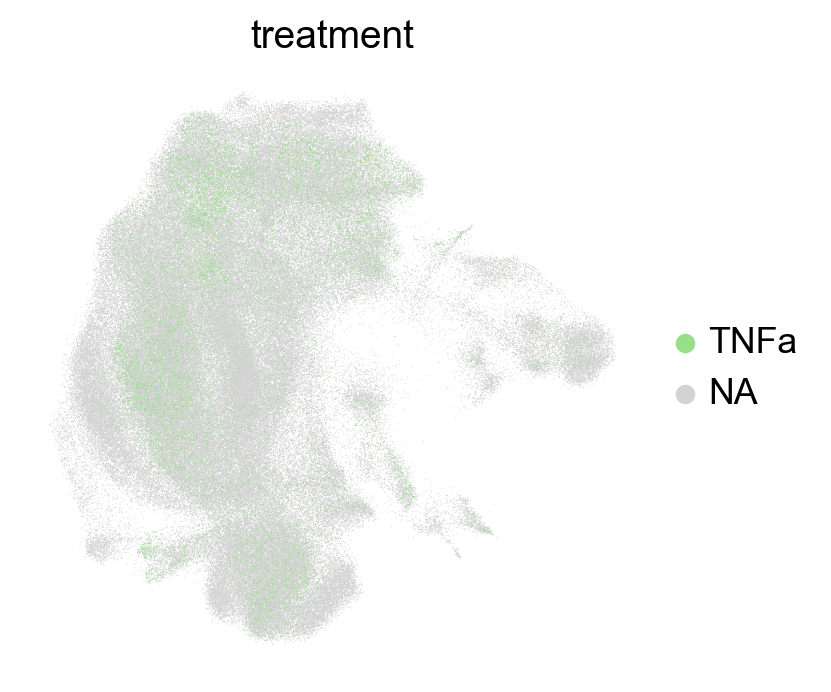

In [22]:
sc.pl.umap(adata, color='treatment', groups=['TNFa'])

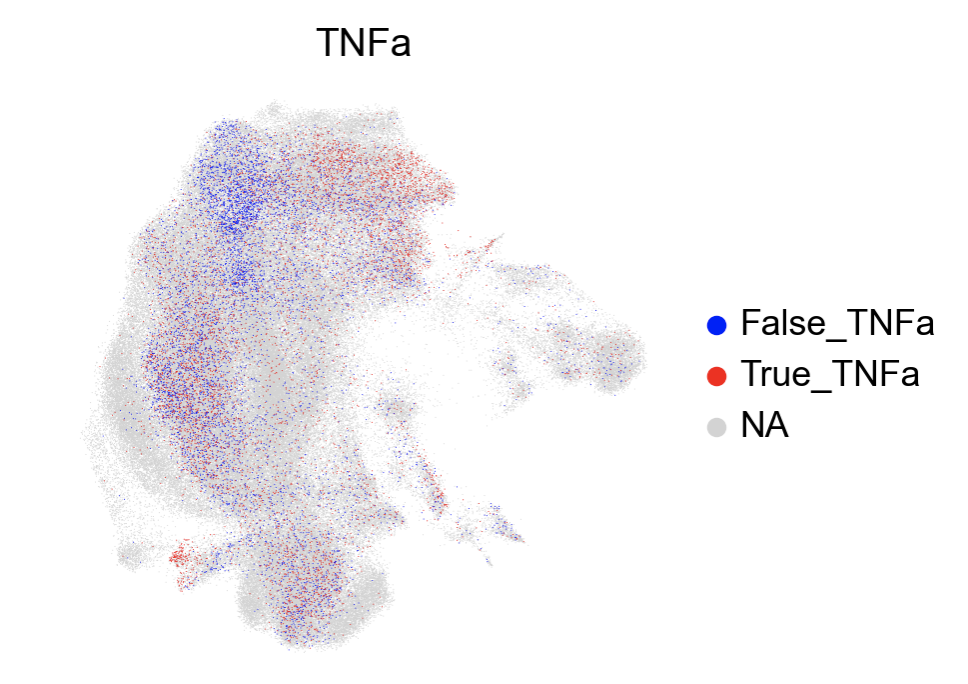

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


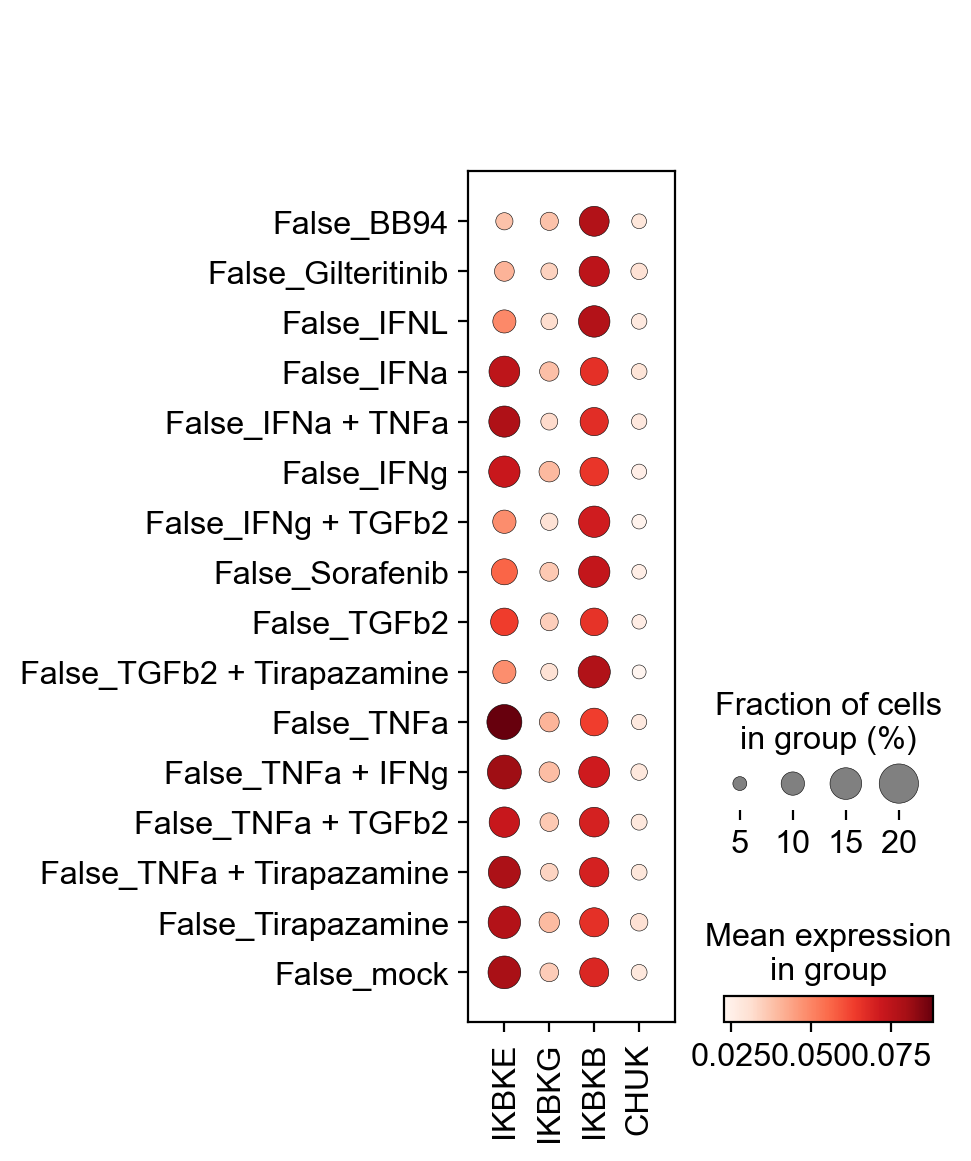

In [45]:
sc.pl.dotplot(
    adata[adata.obs.infected == 'False'],
    list(adata.var_names[adata.var_names.str.startswith('IKBK')]) + ['CHUK'],
    groupby=['infected', 'treatment'],
#     standard_scale='var', colorbar_title='scaled expression\nacross groups'
)

In [9]:
from utils import enrich, plot_volcano

In [71]:
subset = adata[adata.obs.infected == 'False']

In [73]:
sc.tl.rank_genes_groups(subset, groupby='treatment', groups=['TNFa'], method='wilcoxon')

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/yuge/covid-perturbation/utils.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-log10(pvals)'] = -np.log10(df.pvals_adj.values)


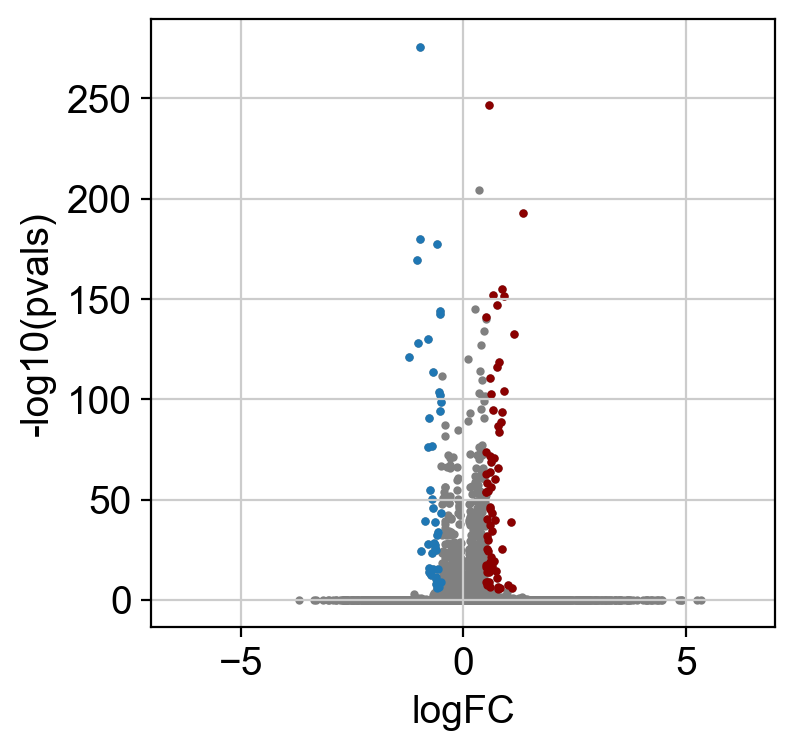

In [78]:
df, up, dn = plot_volcano(sc.get.rank_genes_groups_df(subset, group='TNFa'), fc_thresh=.5, logpval_thresh=5)

In [79]:
up

array(['NCOA7', 'MSMB', 'CXCL8', 'CD55', 'SLC34A2', 'CXCL1', 'CYBA',
       'TNFAIP2', 'LCN2', 'VMO1', 'CP', 'LYPD2', 'C3', 'SAA1', 'BPIFA1',
       'PI3', 'BPIFB1', 'CCL20', 'GDF15', 'EDN1', 'BCL2A1', 'RARRES1',
       'MUC5B', 'SCGB3A1', 'SAA2', 'C11orf96', 'TNFAIP3', 'CAPN13',
       'TMEM45A', 'AKR1C1', 'SERPINB2', 'CLDN10', 'DENND2C', 'MSLN',
       'TFPI2', 'RCAN1', 'FCGBP', 'ABCA13', 'KYNU', 'DNAJB9', 'CXCL6',
       'HLA-DRB5', 'IRAK3', 'HPGD', 'ANKRD36C', 'ANKRD37', 'RNASE1',
       'SLC19A2', 'WIPI1', 'PROM1', 'HMOX1', 'HNMT', 'RELB', 'NR4A3',
       'CNKSR3', 'ADM', 'OLFM4', 'PSTPIP2', 'LRRN1', 'PRXL2B', 'DOC2B',
       'SMIM31', 'SLC7A11', 'GSTA2', 'CAPN8', 'NLRP2', 'HOXB2'],
      dtype=object)

In [80]:
dn

array(['RSAD2', 'CXCL14', 'CDH6', 'HLA-DPB1', 'BTN3A2', 'LSP1', 'OAS3',
       'ARL4D', 'MX2', 'GBP4', 'DDX60', 'SERPING1', 'IRF9', 'SAMD9L',
       'IFITM1', 'HERC6', 'LGALS7B', 'IGFBP6', 'SPON2', 'IFI44', 'OAS2',
       'TAP1', 'HLA-F', 'IRF1', 'DDIT4', 'EPSTI1', 'EIF2AK2', 'KRT14',
       'IFIT3', 'IFIT1', 'PSMB9', 'BST2', 'MX1', 'KRT5', 'EGR1', 'S100A2',
       'DUSP1', 'ISG15', 'IFI44L', 'XAF1', 'STAT1', 'JUNB', 'IER2',
       'IFI6', 'TXNIP', 'IFI27', 'FOS'], dtype=object)

In [98]:
enrich(up, adata.var_names, sources=['KEGG'], return_full=True)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:04657,IL-17 signaling pathway,0.000004,True,IL-17 signaling pathway,86,67,7,17686,0.104478,0.081395,query_1,[KEGG:00000],"[CXCL8, CXCL1, LCN2, CCL20, MUC5B, TNFAIP3, CX...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:05323,Rheumatoid arthritis,0.000944,True,Rheumatoid arthritis,84,67,5,17686,0.074627,0.059524,query_1,[KEGG:00000],"[CXCL8, CXCL1, CCL20, CXCL6, HLA-DRB5]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
2,KEGG,KEGG:04064,NF-kappa B signaling pathway,0.001396,True,NF-kappa B signaling pathway,99,67,5,17686,0.074627,0.050505,query_1,[KEGG:00000],"[CXCL8, CXCL1, BCL2A1, TNFAIP3, RELB]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
3,KEGG,KEGG:04668,TNF signaling pathway,0.001812,True,TNF signaling pathway,111,67,5,17686,0.074627,0.045045,query_1,[KEGG:00000],"[CXCL1, CCL20, EDN1, TNFAIP3, CXCL6]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
4,KEGG,KEGG:04061,Viral protein interaction with cytokine and cy...,0.008901,True,Viral protein interaction with cytokine and cy...,92,67,4,17686,0.059701,0.043478,query_1,[KEGG:00000],"[CXCL8, CXCL1, CCL20, CXCL6]","[[KEGG], [KEGG], [KEGG], [KEGG]]"
5,KEGG,KEGG:04216,Ferroptosis,0.008901,True,Ferroptosis,40,67,3,17686,0.044776,0.075000,query_1,[KEGG:00000],"[CP, HMOX1, SLC7A11]","[[KEGG], [KEGG], [KEGG]]"
6,KEGG,KEGG:05202,Transcriptional misregulation in cancer,0.009353,True,Transcriptional misregulation in cancer,178,67,5,17686,0.074627,0.028090,query_1,[KEGG:00000],"[CXCL8, BCL2A1, HPGD, PROM1, NR4A3]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"
7,KEGG,KEGG:05134,Legionellosis,0.018884,True,Legionellosis,57,67,3,17686,0.044776,0.052632,query_1,[KEGG:00000],"[CXCL8, CXCL1, C3]","[[KEGG], [KEGG], [KEGG]]"
8,KEGG,KEGG:05418,Fluid shear stress and atherosclerosis,0.020753,True,Fluid shear stress and atherosclerosis,133,67,4,17686,0.059701,0.030075,query_1,[KEGG:00000],"[CYBA, EDN1, HMOX1, GSTA2]","[[KEGG], [KEGG], [KEGG], [KEGG]]"
9,KEGG,KEGG:04060,Cytokine-cytokine receptor interaction,0.026788,True,Cytokine-cytokine receptor interaction,255,67,5,17686,0.074627,0.019608,query_1,[KEGG:00000],"[CXCL8, CXCL1, CCL20, GDF15, CXCL6]","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG]]"


### Scoring NFkB pathway in rest of data

Get genes from https://www.genome.jp/entry/pathway+hsa04064

In [101]:
nfkb_genes = ['LCK','ZAP70','LAT','PLCG1','PRKCQ','IGH','SYK','LYN','BLNK','BTK','PLCG2','PRKCB','CARD10','CARD11','CARD14','BCL10','MALT1','IL1B','IL1R1','MYD88','IRAK1','IRAK4','TRAF6','TNF','TNFRSF1A','RIPK1','TRADD','TRAF2','TRAF5','BIRC2','BIRC3','EDA','EDAR','EDARADD','CYLD','EDA2R','RIGI','TRIM25','LBP','CD14','TLR4','LY96','TIRAP','TICAM2','TICAM1','CD40LG','CD40','TRAF3','TNFSF11','TNFRSF11A','LTA','LTB','TNFSF14','LTBR','MAP3K14','MAP3K7','TAB1','TAB2','TAB3','TNFSF13B','TNFRSF13C','IKBKG','CHUK','IKBKB','PARP1','PIAS4','UBE2I','ATM','PIDD1','ERC1','NFKBIA','NFKB1','RELA','CFLAR','XIAP','BCL2L1','BCL2','GADD45A','GADD45B','GADD45G','TRAF1','BCL2A1','NFKB2','CXCL8','TNFAIP3','PTGS2','CCL4','CCL4L2','CCL4L1','CXCL1','CXCL2','CXCL3','VCAM1','PLAU','CSNK2A1','CSNK2A2','CSNK2A3','CSNK2B','RELB','CCL13','CCL19','CCL21','CXCL12','ICAM1']
overlap = list(set(nfkb_genes) & set(adata.var_names))
print(overlap)

['CSNK2A1', 'TRAF5', 'GADD45B', 'TNFSF13B', 'CSNK2A2', 'PRKCQ', 'TAB3', 'TNF', 'CHUK', 'IL1R1', 'EDA2R', 'TRAF1', 'PRKCB', 'TAB2', 'BLNK', 'CARD14', 'TNFSF11', 'TRAF3', 'PLAU', 'EDAR', 'UBE2I', 'TAB1', 'MALT1', 'EDA', 'CXCL1', 'ATM', 'BIRC3', 'BIRC2', 'CD14', 'CD40', 'CXCL2', 'RIPK1', 'CCL21', 'RELA', 'CARD11', 'CCL4L2', 'CFLAR', 'TNFRSF13C', 'TRADD', 'TICAM1', 'ZAP70', 'MAP3K14', 'TRAF6', 'LTA', 'MYD88', 'VCAM1', 'TNFSF14', 'CCL4', 'TIRAP', 'IRAK1', 'PIAS4', 'NFKB2', 'LCK', 'PTGS2', 'TRAF2', 'TICAM2', 'GADD45G', 'IKBKG', 'PIDD1', 'CXCL3', 'NFKBIA', 'BCL2', 'ICAM1', 'LTB', 'PARP1', 'BTK', 'IKBKB', 'XIAP', 'CSNK2B', 'PLCG2', 'LAT', 'GADD45A', 'LTBR', 'TRIM25', 'CXCL8', 'LYN', 'IL1B', 'TLR4', 'EDARADD', 'LBP', 'SYK', 'BCL2A1', 'NFKB1', 'TNFRSF1A', 'RELB', 'MAP3K7', 'CSNK2A3', 'BCL10', 'LY96', 'TNFRSF11A', 'CCL19', 'CXCL12', 'TNFAIP3', 'CYLD', 'BCL2L1', 'CARD10', 'ERC1', 'PLCG1']


In [117]:
sc.tl.score_genes(adata, overlap, score_name='NFkB score')

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


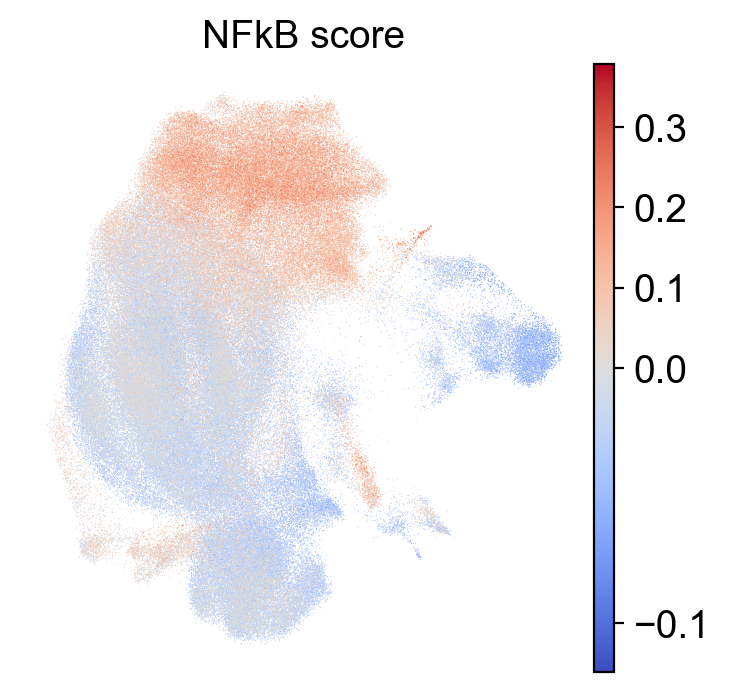

In [118]:
sc.pl.umap(adata, color='NFkB score', cmap='coolwarm', vcenter=0)

In [131]:
adata.obs['NFkB score'] -= min(adata.obs['NFkB score'])

/tmp/ipykernel_442500/3527720823.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


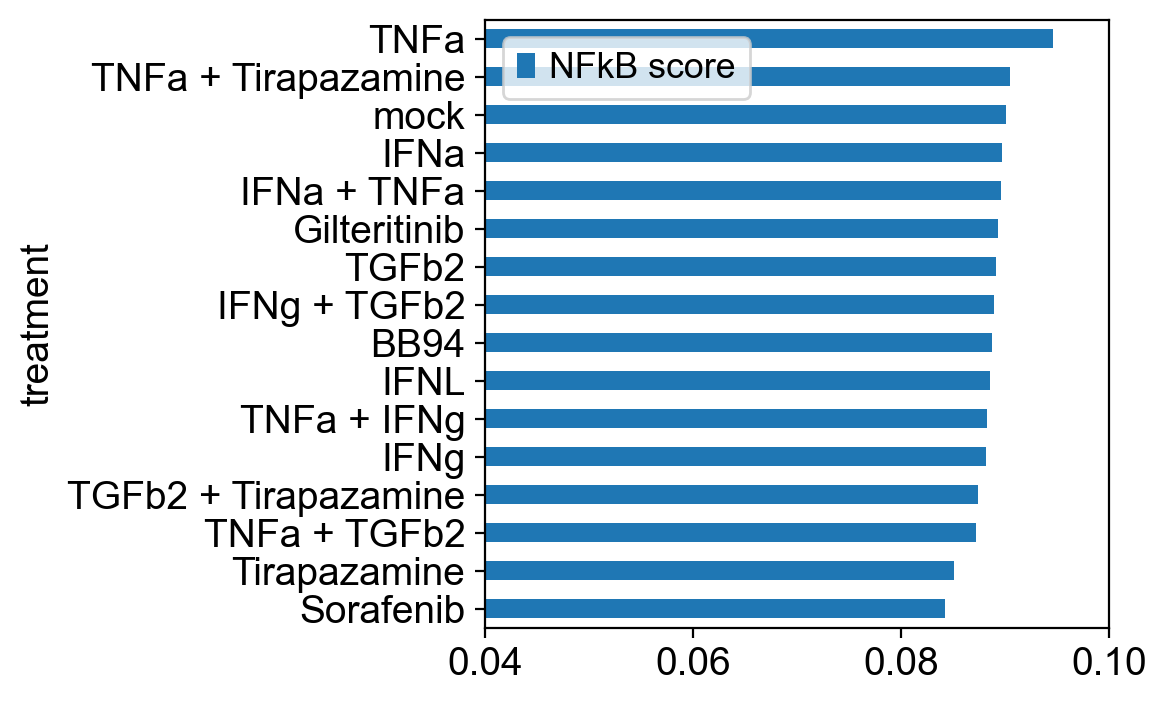

In [155]:
adata[(adata.obs.patient == 'Patient 4') & (adata.obs.infected == 'False')].obs[['NFkB score', 'treatment']].groupby('treatment').mean().sort_values(by='NFkB score').plot.barh()
plt.xlim(.04, .10)
plt.grid(b=False)
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Correlation of percentage of\nviral transcripts in a cell w/ NFkB activity')

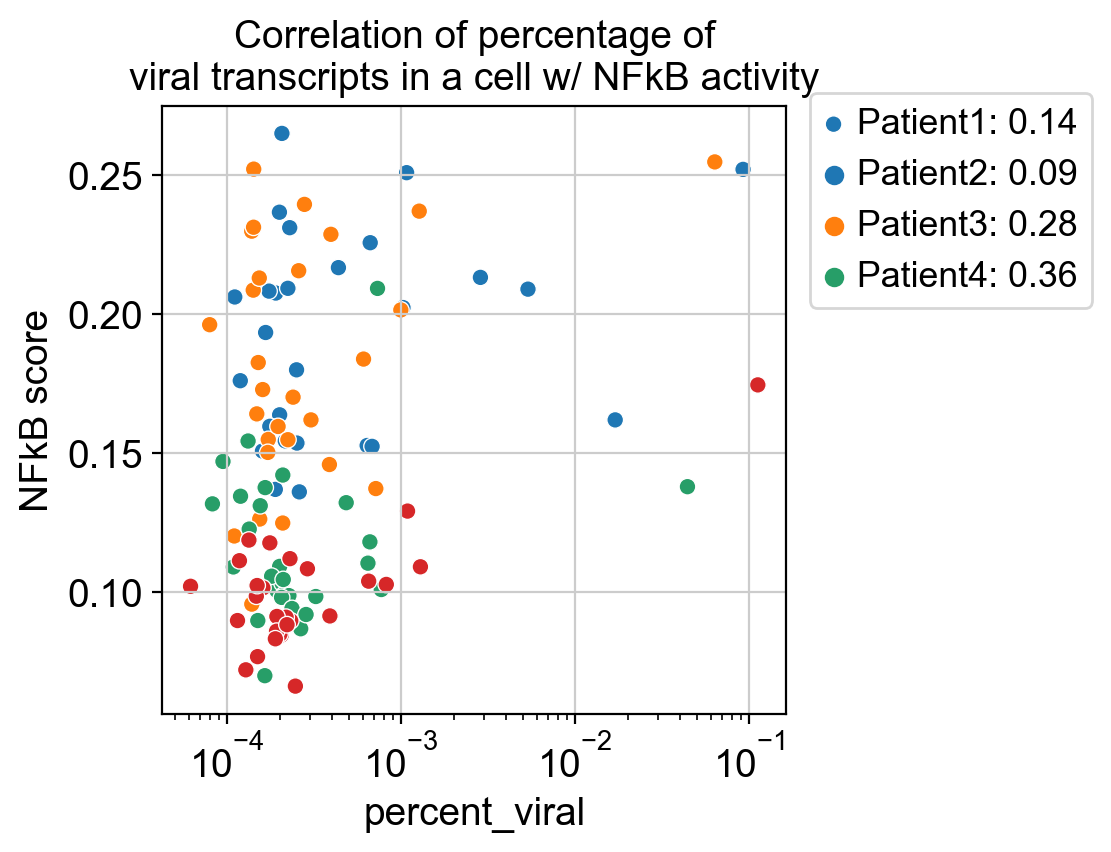

In [162]:
df = adata.obs[['percent_viral', 'NFkB score', 'patient', 'leiden']]
df = df[df.percent_viral > .000001]  # because sparsity deflates pearson and spearman

corr = []
from scipy.stats import pearsonr
for p in df.patient.cat.categories:
    score = df[df.patient == p]['NFkB score'].values
    viralp = df[df.patient == p].percent_viral.values
    corr.append(pearsonr(score, viralp)[0])


sns.scatterplot(
    data=df.groupby(['patient', 'leiden']).mean().reset_index(),
    x='percent_viral',
    y='NFkB score',
    hue='patient'
)
plt.xscale('log')
plt.legend([f'Patient{i+1}: {corr[i]:.2f}' for i in range(4)], bbox_to_anchor=(1.01, 1.05))
plt.title('Correlation of percentage of\nviral transcripts in a cell w/ NFkB activity')